# **LOAN PREDICTION - UNSCHOOL PROJECT -1**

### **Exploring the dataset**

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_df = pd.read_csv(r"C:\Users\rithulaa\Downloads\loan-train.csv")
test_df  = pd.read_csv(r'C:\Users\rithulaa\Downloads\loan-test.csv')

In [12]:
test_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [13]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
train_df.shape

(614, 13)

In [15]:
100*train_df.isnull().sum()/len(train_df) #percentage of missing values

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [16]:
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [17]:
train_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
train_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
train_df['Married'] = train_df['Married'].replace(np.nan,'Yes')
train_df['Dependents'] = train_df['Dependents'].replace(np.nan,'0')
train_df['Self_Employed'] = train_df['Self_Employed'].replace(np.nan,'No')
train_df['Gender'] = train_df['Gender'].replace(np.nan,'Male')
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].median())

In [21]:
100*train_df.isnull().sum()/len(train_df) #percentage of missing values becomes nill

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [22]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### **Data Visualization**

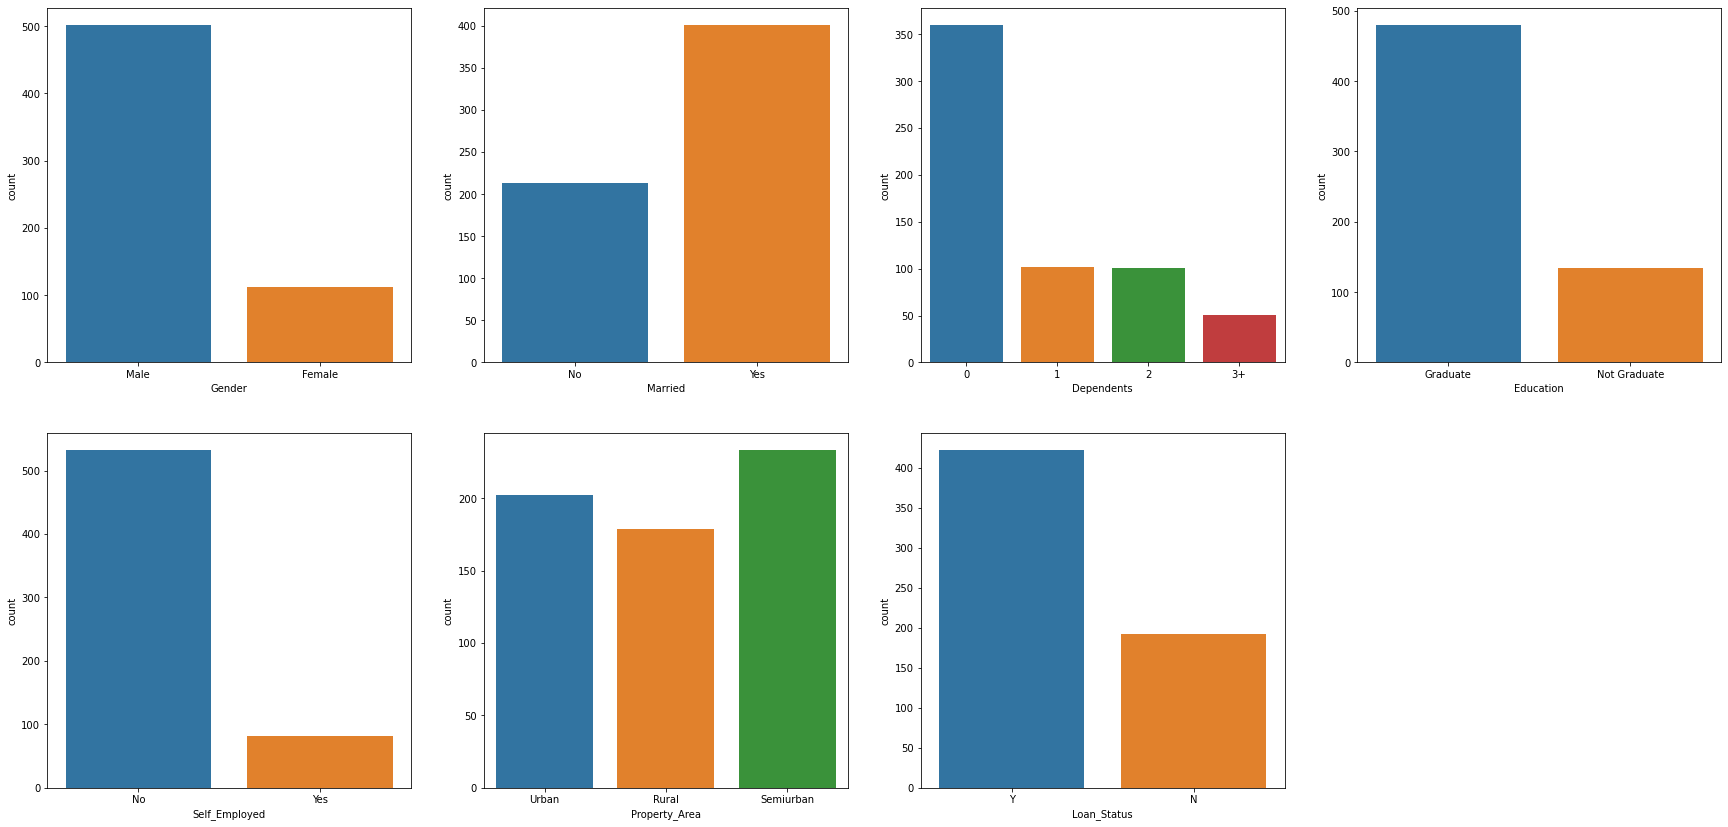

In [23]:
#Categorical Column Plot and Visualization
def plot_count(var_list):
    plt.figure(figsize=(30,30))
    for var in var_list:
        plt.subplot(4,4,var_list.index(var)+1)
        ax=sns.countplot(train_df[var], data = train_df) 
    plt.show()

var_list =['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']
plot_count(var_list)

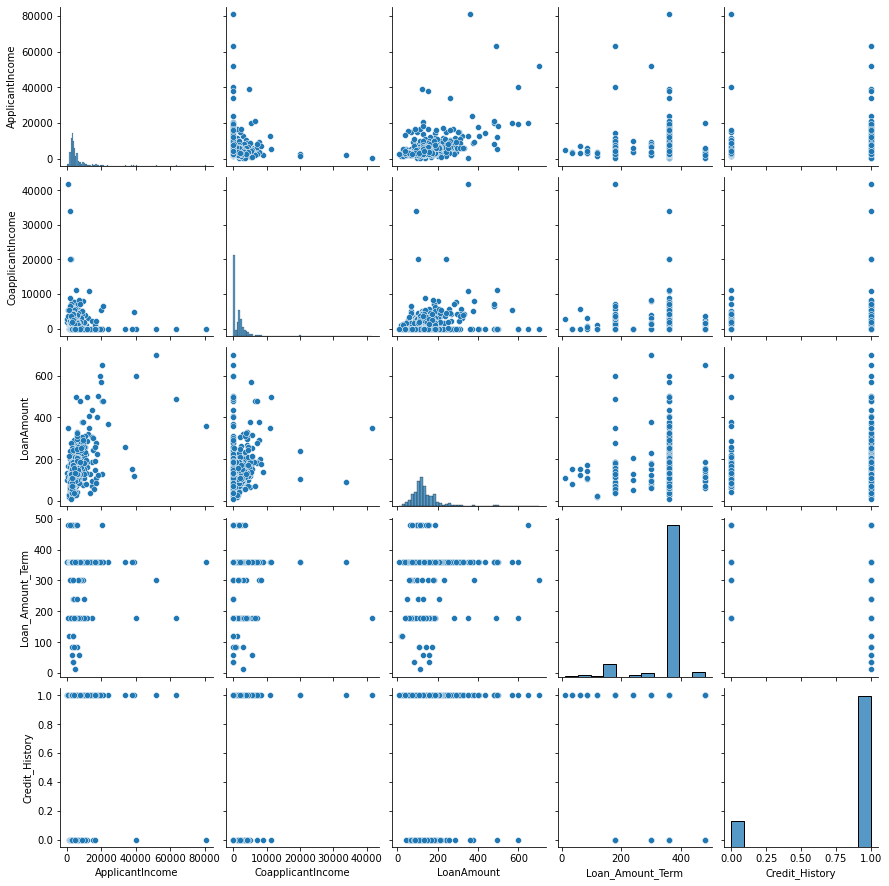

In [24]:
sns.pairplot(train_df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

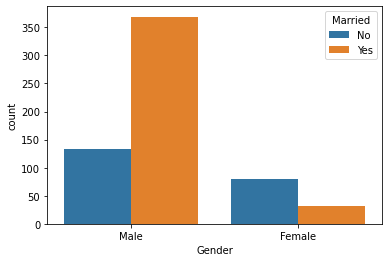

In [25]:
sns.countplot('Gender', data = train_df, hue = 'Married')

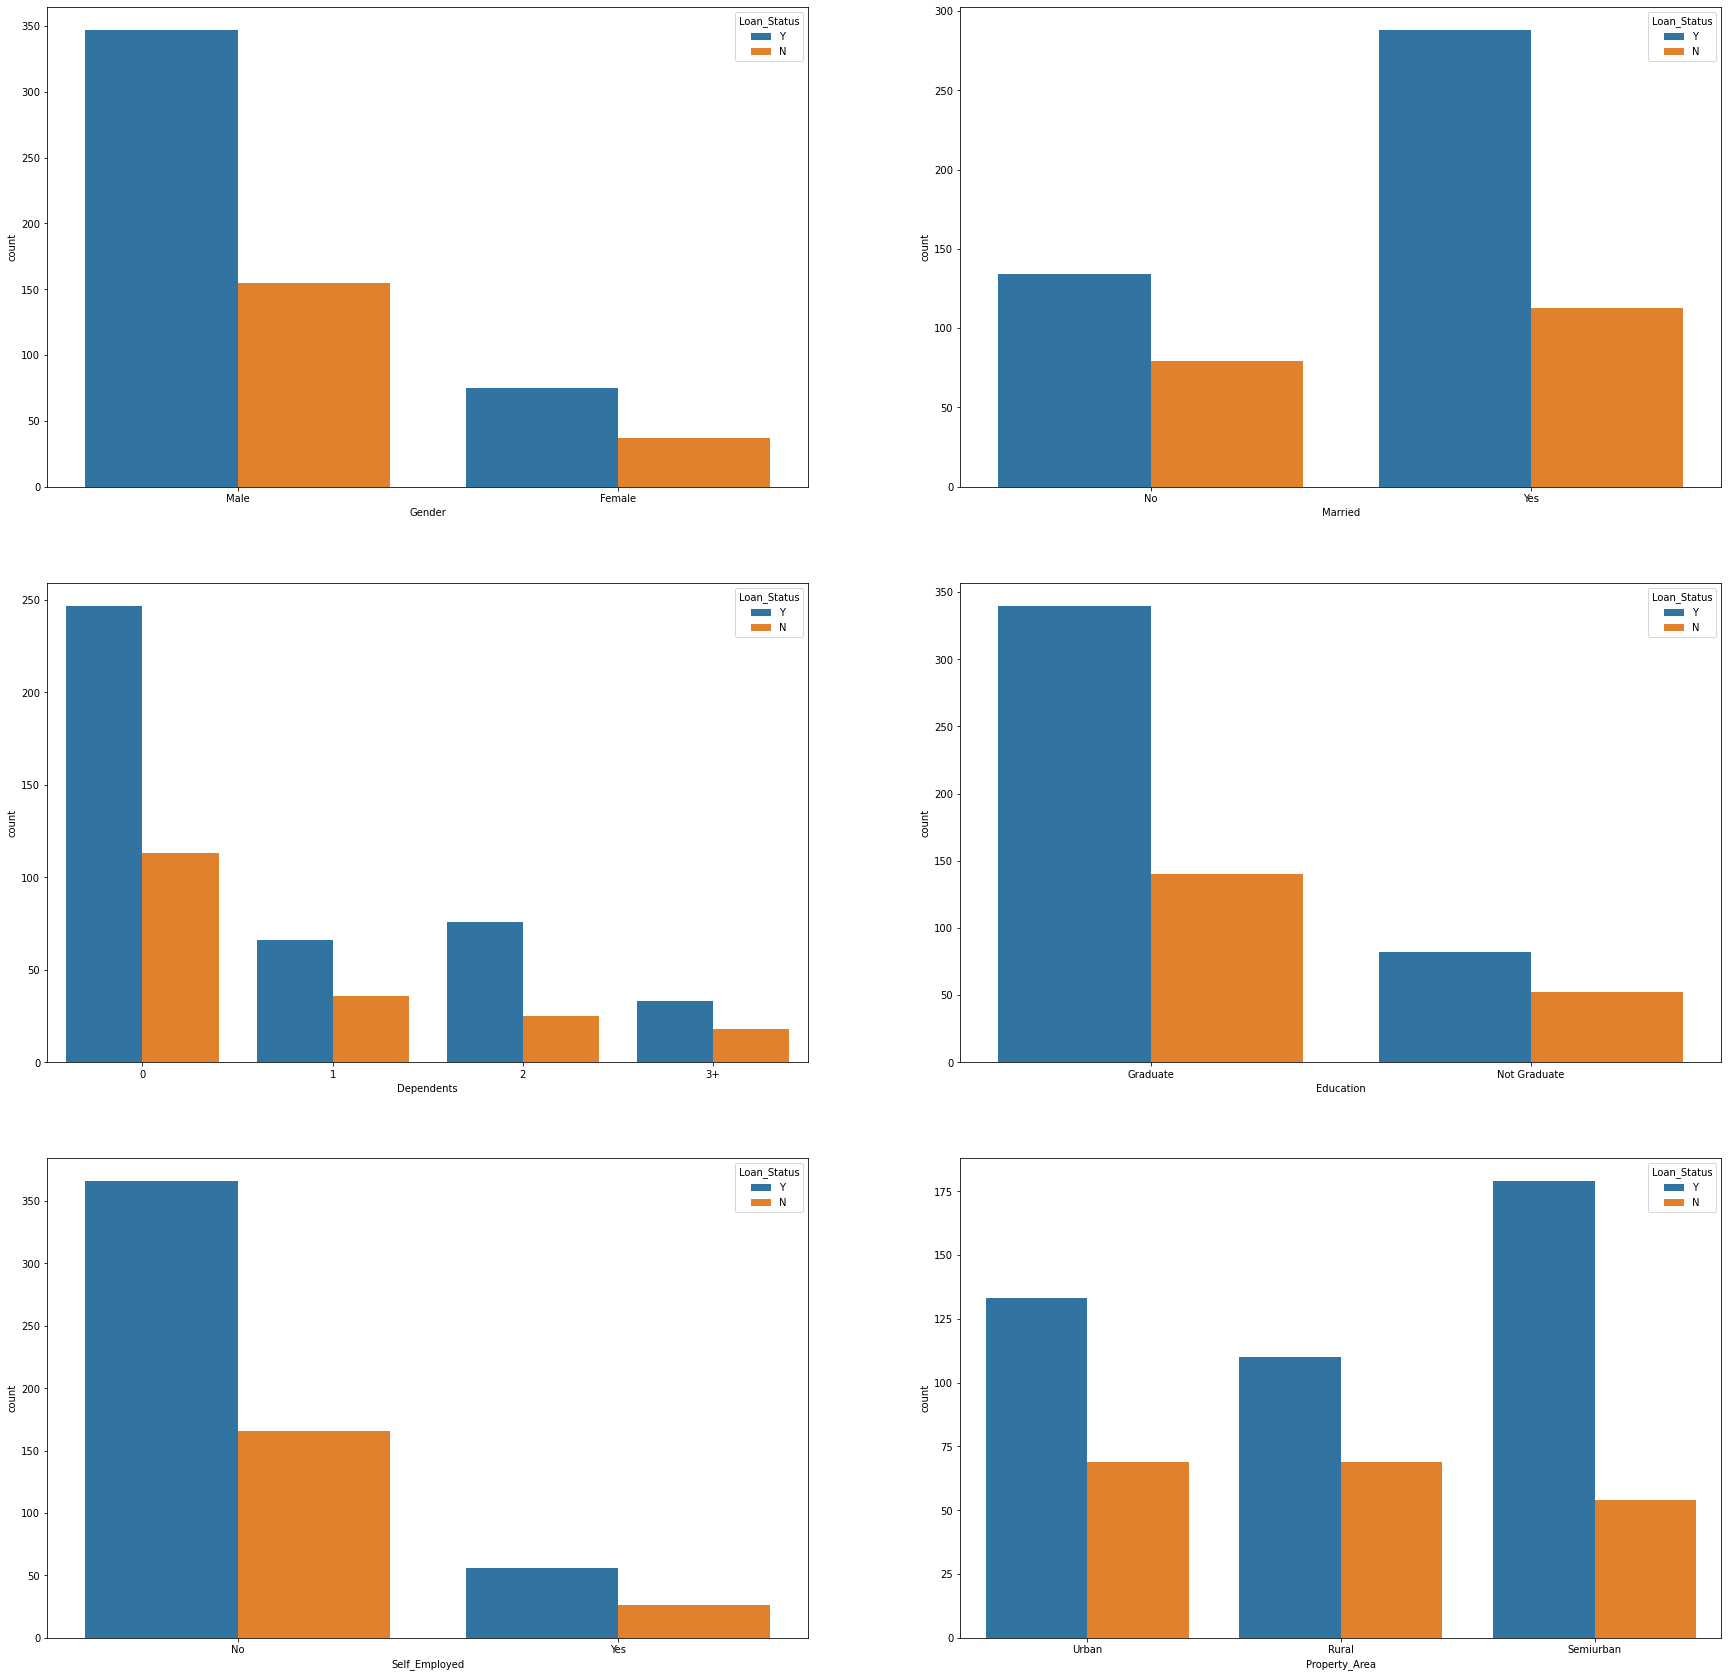

In [26]:
def plot_count1(var_list):
    plt.figure(figsize=(30,30))
    for var in var_list:
        plt.subplot(3,2,var_list.index(var)+1)
        ax=sns.countplot(train_df[var], data = train_df, hue = 'Loan_Status') 
    plt.show()
var_list=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']
plot_count1(var_list)

In [27]:
train_df.Loan_Status.replace(['N', 'Y'], [0, 1], inplace =True)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


<AxesSubplot:>

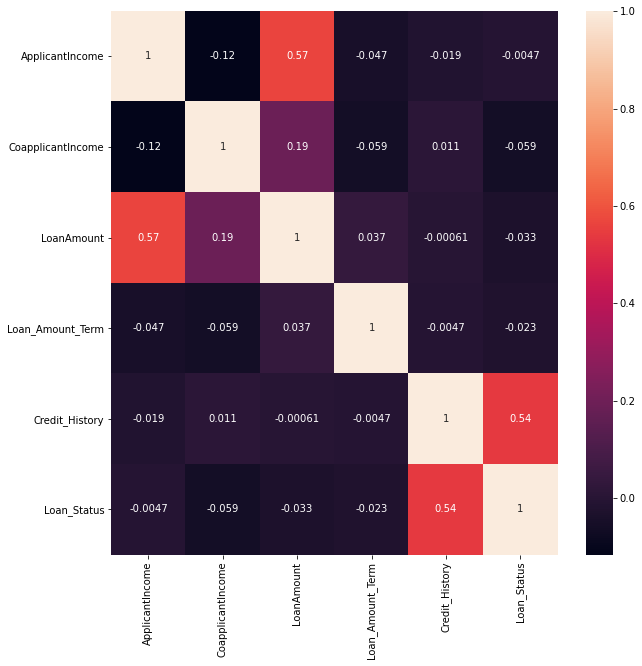

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(train_df.corr(), annot = True)

### **Feature Engineering**

In [29]:
df_cat = train_df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area']]

In [30]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         614 non-null    object
 1   Married        614 non-null    object
 2   Dependents     614 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  614 non-null    object
 5   Property_Area  614 non-null    object
dtypes: object(6)
memory usage: 28.9+ KB


In [31]:
df_cat_dummies = pd.get_dummies(df_cat)
df_cat_dummies

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [32]:
train_df = pd.concat([train_df, df_cat_dummies], axis = 1)
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,...,0,0,0,1,0,1,0,1,0,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,...,0,0,1,1,0,1,0,1,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,...,1,0,0,1,0,1,0,0,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,...,0,1,0,1,0,1,0,0,0,1


In [33]:
train_df.drop(['Loan_ID','Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area',], axis = 1, inplace  =True)
train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


<AxesSubplot:>

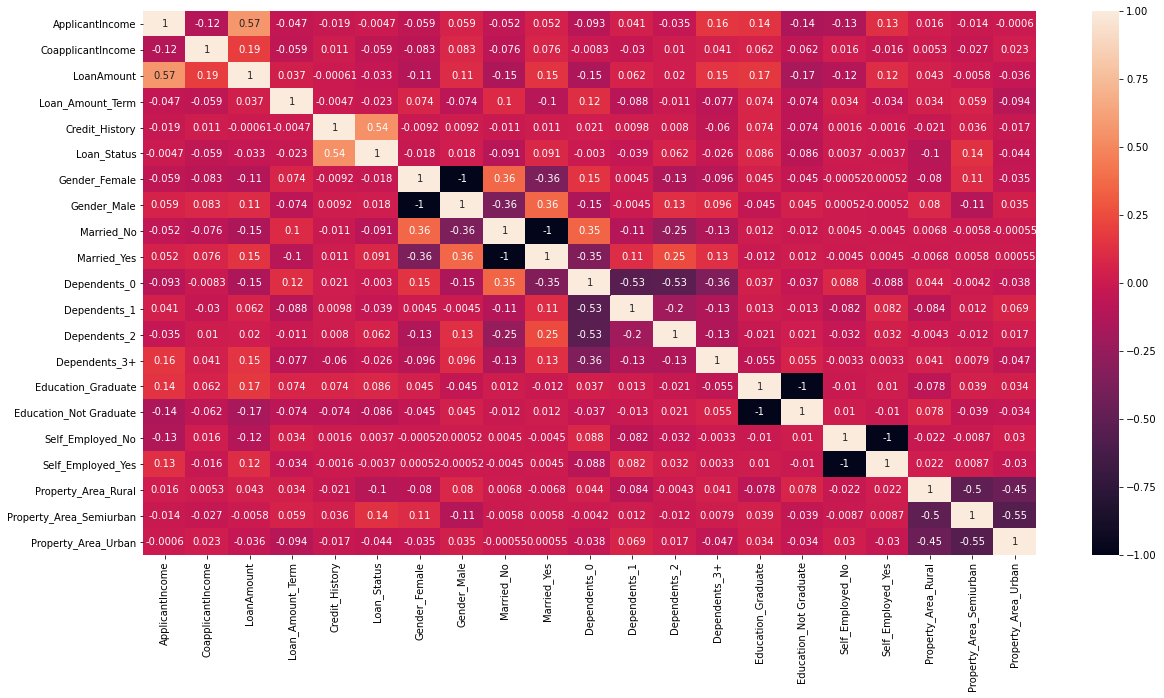

In [34]:
plt.figure(figsize = (20,10))
sns.heatmap(train_df.corr(), annot = True)

### **Train Test split**

In [35]:
X = train_df.drop(['Loan_Status'], axis =1)
y = train_df['Loan_Status']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 142)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Logistic** **Regression** - linear model

Logistic regression is considered as a linear model because the decision boundary it generates is linear, which can be used for classification purposes

In [36]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

lr_pred = logreg.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, lr_pred)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, lr_pred)))
print(confusion_matrix(y_test, lr_pred))
print(metrics.classification_report(y_test, lr_pred))

Accuracy 0.8162162162162162
Recall/Sensitivity 0.9763779527559056
[[ 27  31]
 [  3 124]]
              precision    recall  f1-score   support

           0       0.90      0.47      0.61        58
           1       0.80      0.98      0.88       127

    accuracy                           0.82       185
   macro avg       0.85      0.72      0.75       185
weighted avg       0.83      0.82      0.80       185



In [37]:
test_lr_predict = logreg.predict(X)
test_lr_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [38]:
import math
RMSE=math.sqrt(metrics.mean_squared_error(y_true = y_test, y_pred = lr_pred))
print(RMSE)

0.428700109381586
